 # E-commerce Public Dataset

## Outcome

- How is the growth of sales on past year?
- How many user that e-commerce have based on the state?
- How is the delivery rate of the items ordered?
- What is the top 10 most product user order?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Data Wrangling

### Gathering Data

#### Memuat tabel customers

In [2]:
sheet_url_1 = "https://docs.google.com/spreadsheets/d/1p6PHaeLJ5OIxB-rY0I-S09UqfbRrCK6F1L7pkczpzXM/edit#gid=1667242544"
sheet_url_1_trf = sheet_url_1.replace("/edit#gid=", "/export?format=csv&gid=")

df_customers = pd.read_csv(sheet_url_1_trf)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### Memuat tabel orders

In [3]:
sheet_url_2 = "https://docs.google.com/spreadsheets/d/1B5sDukmi1m_PRSxs8lBghr0h1SUzTvkLXpH1sOxMJZU/edit#gid=86987991"
sheet_url_2_trf = sheet_url_2.replace("/edit#gid=", "/export?format=csv&gid=")

df_orders = pd.read_csv(sheet_url_2_trf)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


##### Memuat tabel order items

In [4]:
sheet_url_3 = "https://docs.google.com/spreadsheets/d/1lZtCF58wptoowWZFiXvLZDZaJ56ReiXDLDsAS4n9piU/edit#gid=1146214494"
sheet_url_3_trf = sheet_url_3.replace("/edit#gid=", "/export?format=csv&gid=")

df_order_items = pd.read_csv(sheet_url_3_trf)
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 9:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### Memuat tabel products

In [5]:
sheet_url_4 = "https://docs.google.com/spreadsheets/d/1p7FCJT5-AgXjEfRKYKVC3S88rCCXLuPkkxYkrw7z7eI/edit#gid=9304127"
sheet_url_4_trf = sheet_url_4.replace("/edit#gid=", "/export?format=csv&gid=")

df_products= pd.read_csv(sheet_url_4_trf)
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### Memuat tabel product catagory

In [6]:
sheet_url_5 = "https://docs.google.com/spreadsheets/d/1aJCitegGPo6eSslpFxkygcW357rydUwuFljHu8d7cW8/edit#gid=1606082024"
sheet_url_5_trf = sheet_url_5.replace("/edit#gid=", "/export?format=csv&gid=")

df_product_catagory_name= pd.read_csv(sheet_url_5_trf)
df_product_catagory_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

In [7]:
# fungsi untuk mengecek persen missing value
def missing_percentage(df):

    total_missing = df.isnull().sum()
    total_cells = df.size
    percentage_missing = round((total_missing / total_cells) * 100 , 2)
    return percentage_missing

#### Menilai data df_customers

In [8]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Memeriksa duplikasi dan parameter statistik df_customers





In [9]:
print("Jumlah duplikasi: ", df_customers.duplicated().sum())
df_customers.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [10]:
df_customers["customer_state"].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

#### Menilai data df_orders

In [11]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# Mengecek missing value
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
# Mengecek persentase missing value
percentages = missing_percentage(df_orders)

print(percentages)

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.02
order_delivered_carrier_date     0.22
order_delivered_customer_date    0.37
order_estimated_delivery_date    0.00
dtype: float64


Terdapat missing value pada order_approved_at sebesar 0.02%, missing value pada order_delivered_carrier_date sebesar 0.22%, dan missing value pada order_delivered_customer_date sebesar 0.37%

#### Memeriksa duplikasi pada df_orders

In [14]:
print("Jumlah duplikasi: ", df_orders.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai data df_order_items

In [15]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak terdapat perbedaan jumlah data sehingga tidak terdapat missing value pada df_order_items

#### Memeriksa duplikasi dan parameter statistik df_order_items

In [16]:
print("Jumlah duplikasi: ", df_order_items.duplicated().sum())
df_order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai data df_products

In [17]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat perbedaan jumlah nilai sehingga terdapat missing value


In [18]:
# Mengecek missing value
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
print("Jumlah duplikasi: ", df_products.duplicated().sum())
df_products.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [20]:
# Mengecek persentase missing value
percentages_product = missing_percentage(df_products)
print(percentages_product)

product_id                    0.00
product_category_name         0.21
product_name_lenght           0.21
product_description_lenght    0.21
product_photos_qty            0.21
product_weight_g              0.00
product_length_cm             0.00
product_height_cm             0.00
product_width_cm              0.00
dtype: float64


#### Menilai data df_product_catagory_name

In [21]:
df_product_catagory_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tidak terdapat perbedaan jumlah data per kolom sehingga tidak terdapat missing data


In [22]:
print("Jumlah duplikat: ", df_product_catagory_name.duplicated().sum())

Jumlah duplikat:  0


### Cleaning Data

#### Menghapus kolom yang tidak diperlukan

In [23]:
product_to_drop = ["product_name_lenght", "product_description_lenght", "product_photos_qty",
                   "product_weight_g", "product_length_cm", "product_height_cm",
                   "product_width_cm"
]
df_products = df_products.drop((product_to_drop), axis=1)

In [24]:
df_customers = df_customers.drop(("customer_unique_id"), axis=1)

In [25]:
df_orders = df_orders.drop(["order_approved_at", "order_delivered_carrier_date",
                            "order_delivered_customer_date", "order_estimated_delivery_date"
], axis=1)

In [26]:
df_order_items = df_order_items.drop(["shipping_limit_date", "freight_value"], axis=1)

#### Menggabungkan semua data menjadi satu tabel

In [27]:
df1 = pd.merge(df_order_items, df_products, on="product_id", how="outer")
df2 = pd.merge(df_customers, df_orders, on="customer_id", how="outer")
df3 = pd.merge(df1, df_product_catagory_name, on="product_category_name", how = "outer")
df_sales = pd.merge(df2, df3, on="order_id", how = "inner")
df_sales.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 9:51:30,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,casa_conforto,home_confort


In [28]:
# Mengecek persentase missing value
percentages_sales = missing_percentage(df_sales)
print(percentages_sales)

customer_id                      0.00
customer_zip_code_prefix         0.00
customer_city                    0.00
customer_state                   0.00
order_id                         0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_item_id                    0.00
product_id                       0.00
seller_id                        0.00
price                            0.00
product_category_name            0.11
product_category_name_english    0.11
dtype: float64


In [30]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_zip_code_prefix       112650 non-null  int64  
 2   customer_city                  112650 non-null  object 
 3   customer_state                 112650 non-null  object 
 4   order_id                       112650 non-null  object 
 5   order_status                   112650 non-null  object 
 6   order_purchase_timestamp       112650 non-null  object 
 7   order_item_id                  112650 non-null  int64  
 8   product_id                     112650 non-null  object 
 9   seller_id                      112650 non-null  object 
 10  price                          112650 non-null  float64
 11  product_category_name          111047 non-null  object 
 12  product_category_name_english 

In [31]:
# Menghapus baris yang berisi missing value karena product_category_name tidak dapat diisi dan persentase missing value kecil (<1%)
df_sales_cleaned = df_sales.dropna()

In [32]:
# Check ulang missing values df_sales
missing_values_2 = df_sales_cleaned.isnull().sum()
total_values_2 = df_sales_cleaned.size
percentage_missing_after = (missing_values_2 / total_values_2) * 100
print(percentage_missing_after)

customer_id                      0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
order_id                         0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
price                            0.0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64


## Exploratory Data Analysis (EDA)

### Eksplorasi data customers

In [33]:
customer_id_per_state = df_sales_cleaned.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
customer_id_per_state

customer_state
SP    40801
RJ    12569
MG    11375
RS     5351
PR     4928
SC     3554
BA     3314
DF     2094
ES     2008
GO     1959
PE     1630
CE     1312
PA      951
MT      891
MA      730
MS      700
PB      523
PI      486
RN      476
AL      407
SE      343
TO      275
RO      242
AM      146
AC       79
AP       68
RR       44
Name: customer_id, dtype: int64

### Eksplorasi data orders

In [34]:
order_status_by_customer_id = df_sales_cleaned.groupby(by="order_status").order_id.count()
order_status_by_customer_id

order_status
approved            3
canceled          526
delivered      108638
invoiced          347
processing        344
shipped          1158
unavailable         7
Name: order_id, dtype: int64

### Eksplorasi data gabungan

In [35]:
# Assuming df_sales_cleaned is your DataFrame
df_sales_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_sales_cleaned['order_purchase_timestamp'])

df_sales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111023 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    111023 non-null  object        
 1   customer_zip_code_prefix       111023 non-null  int64         
 2   customer_city                  111023 non-null  object        
 3   customer_state                 111023 non-null  object        
 4   order_id                       111023 non-null  object        
 5   order_status                   111023 non-null  object        
 6   order_purchase_timestamp       111023 non-null  datetime64[ns]
 7   order_item_id                  111023 non-null  int64         
 8   product_id                     111023 non-null  object        
 9   seller_id                      111023 non-null  object        
 10  price                          111023 non-null  float64       
 11  produ

C:\Users\Hasnan Ramadhan\AppData\Local\Temp\ipykernel_17648\1326170838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_sales_cleaned['order_purchase_timestamp'])


In [36]:
df_sales_cleaned['Month'] = df_sales_cleaned['order_purchase_timestamp'].dt.month
df_sales_cleaned['Year'] = df_sales_cleaned['order_purchase_timestamp'].dt.year
df_sales_cleaned.head()

C:\Users\Hasnan Ramadhan\AppData\Local\Temp\ipykernel_17648\3372150607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_cleaned['Month'] = df_sales_cleaned['order_purchase_timestamp'].dt.month
C:\Users\Hasnan Ramadhan\AppData\Local\Temp\ipykernel_17648\3372150607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_cleaned['Year'] = df_sales_cleaned['order_purchase_timestamp'].dt.year


,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,product_category_name,product_category_name_english,Month,Year
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,moveis_escritorio,office_furniture,5,2017
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,utilidades_domesticas,housewares,1,2018
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,moveis_escritorio,office_furniture,5,2018
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,moveis_escritorio,office_furniture,3,2018
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,casa_conforto,home_confort,7,2018


In [37]:
df_sales_cleaned.sort_values(by="Year",ascending=False)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,product_category_name,product_category_name_english,Month,Year
56344,69b29f0663441d192e106a8dd6d04f0d,79004,campo grande,MS,5ca64dbf0d6d6aec2ad73e74b918de04,delivered,2018-06-23 15:39:09,1,def8b2856a5c8fea8715aa849a198cd4,7299e27ed73d2ad986de7f7c77d919fa,69.99,brinquedos,toys,6,2018
48740,7f3a050ba677bbe9c55a06687d767c94,57035,maceio,AL,e6ed38386107802a72ec8197195f79a7,delivered,2018-03-22 12:29:47,1,e9b3cf27d68caa64832c4a7c460abcb9,7d456afc660226829370f3173d14520c,160.00,market_place,market_place,3,2018
90489,4129a074aa14aa3d7a5fea1f15ab73bb,56180,cabrobo,PE,1250f8fc1f64f9c63ea3cd35c0a36a85,delivered,2018-01-15 09:36:22,1,5411e9269501a870cabf632f05655131,3d871de0142ce09b7081e2b9d1733cb1,129.00,papelaria,stationery,1,2018
48723,494d0c71dffcc8d13d196e637a65cea9,11095,santos,SP,616dfda2aa81fd23f5e8f47619f650be,delivered,2018-08-19 22:14:43,1,ad19bca6e0f1919433d7e21d534ddb50,527801b552d0077ffd170872eb49683b,44.90,livros_interesse_geral,books_general_interest,8,2018
48724,8bfd33c4e201a1b9b6d07f61298bc6f0,20261,rio de janeiro,RJ,681520892dd4126ee802bcd5aca41c73,delivered,2018-08-11 17:16:14,1,4c25724f63257e928ef05a8f265e52aa,8160255418d5aaa7dbdc9f4c64ebda44,74.90,cama_mesa_banho,bed_bath_table,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20464,ac68706c6f747bf0f7e7986a7ba40155,30380,belo horizonte,MG,34c718970b33419ed6d537a90366231b,delivered,2016-10-05 08:41:18,1,7ed8c74b7ad2f1790a24a24c071da537,46dc3b2cc0980fb8ec44634e21d2718e,119.99,brinquedos,toys,10,2016
38133,2ff5a6455514da421bd25d6e4ceb1d12,33400,lagoa santa,MG,5cb8558cbb7c0c2f00f43468579d3e3c,shipped,2016-10-04 15:02:37,1,ad5396bf96af6ede77130e54ad266c61,184a67a8f9f63234d3a92340bbdb727f,22.37,moveis_decoracao,furniture_decor,10,2016
30041,b102a37db53345d7eb418649b096f8e8,11600,sao sebastiao,SP,56eb381fff8db8d35134693062514084,processing,2016-10-09 12:34:53,1,7f524cd9e1d47c5aa4b15b54d6d146cb,7a073a40a9d3f1fee8bc45670ea1e909,95.00,moveis_decoracao,furniture_decor,10,2016
68367,691d28310063e5b36b732b117f2bcfc0,22793,rio de janeiro,RJ,f688669f48063536e082bb32d634cd46,delivered,2016-10-07 10:28:56,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,99.99,brinquedos,toys,10,2016


In [38]:
total_sales_per_month_2018 = df_sales_cleaned[df_sales_cleaned["Year"] == 2018].groupby(["Month", "Year"]).agg({
    "price": "sum",
})

total_sales_per_month_2018

,,price
Month,Year,
1,2018,927540.91
2,2018,831289.97
3,2018,965835.33
4,2018,988407.09
5,2018,991422.74
6,2018,862737.18
7,2018,890046.19
8,2018,850209.79
9,2018,145.00


In [39]:
total_sales_per_month_2017 = df_sales_cleaned[df_sales_cleaned["Year"] == 2017].groupby(["Month", "Year"]).agg({
    "price": "sum",
})

total_sales_per_month_2017

,,price
Month,Year,
1,2017,118610.23
2,2017,238268.92
3,2017,367630.13
4,2017,350974.16
5,2017,494979.21
6,2017,427380.82
7,2017,494906.82
8,2017,568728.28
9,2017,618497.55


In [40]:
total_sales_per_month_2016 = df_sales_cleaned[df_sales_cleaned["Year"] == 2016].groupby(["Month", "Year"]).agg({
    "price": "sum",
})

total_sales_per_month_2016

,,price
Month,Year,
9,2016,267.36
10,2016,49441.77
12,2016,10.90


In [41]:
top_10_product_category = df_sales_cleaned.groupby("product_category_name_english")['order_id'].count().sort_values(ascending=False).head(10)
top_10_product_category

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: order_id, dtype: int64

#### Analisis RFM

In [42]:
df_sales_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_sales_cleaned['order_purchase_timestamp'])

# Menetapkan tanggal menjadi 31 Januari 2019
reference_date = pd.to_datetime('2019-01-31')

# Menghitung Nilai Recency, Frequency, and Monetary
df_rfm = df_sales_cleaned.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'price': 'sum',
    'customer_id': 'count'
})

# Mengubah nama kolom
df_rfm.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'price': 'Monetary',
    'customer_id': 'Frequency'
}, inplace=True)

# Menampilkan RFM DataFrame
print(df_rfm.head())

C:\Users\Hasnan Ramadhan\AppData\Local\Temp\ipykernel_17648\2576091810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_sales_cleaned['order_purchase_timestamp'])


                                  Recency  Monetary  Frequency
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703      442     89.80          1
000161a058600d5901f007fab4c27140      563     54.90          1
0001fd6190edaaf884bcaf3d49edf079      701    179.99          1
0002414f95344307404f0ace7a26f1d5      532    149.90          1
000379cdec625522490c315e70c7a9fb      303     93.00          1


R (Recency) menunjukan jumlah hari sejak pembelian terakhir seorang customer

M (Monetary) menunjukan jumlah harga pembelian dari seorang customer

F (Frequency) menunjukan jumlah pembelian yang pernah dilakukan oleh customer

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penjualan dari E-Commerce pada beberapa bulan terakhir?

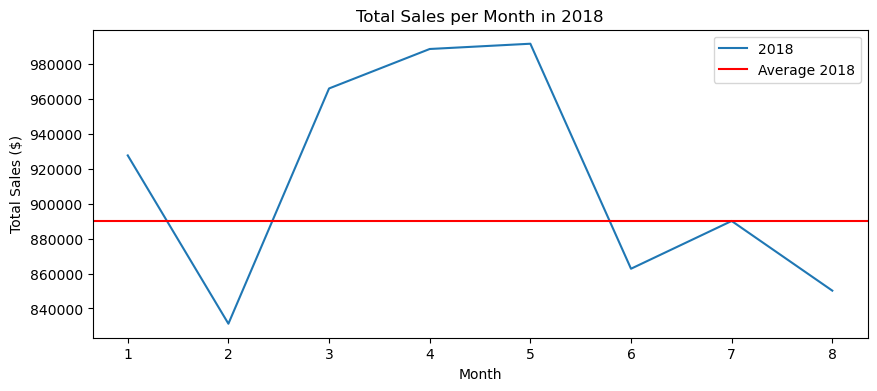

In [43]:
sales_2018 = total_sales_per_month_2018["price"]
sales_2018 = sales_2018.loc[sales_2018.index.get_level_values("Month")<9]
sales_2018_avg = total_sales_per_month_2018["price"].median()

# Memplot line chart
plt.figure(figsize=(10,4))

plt.plot(sales_2018.index.get_level_values("Month"),sales_2018,label="2018")

plt.axhline(y=sales_2018_avg, color='r', linestyle='-', label='Average 2018')

# Menambahkan label dan judul
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales per Month in 2018")
plt.legend()

# Menampilkan plot
plt.show()


### Pertanyaan 2: Berapa jumlah pelanggan e-commerce di atas rata-rata berdasarkan negara bagian?

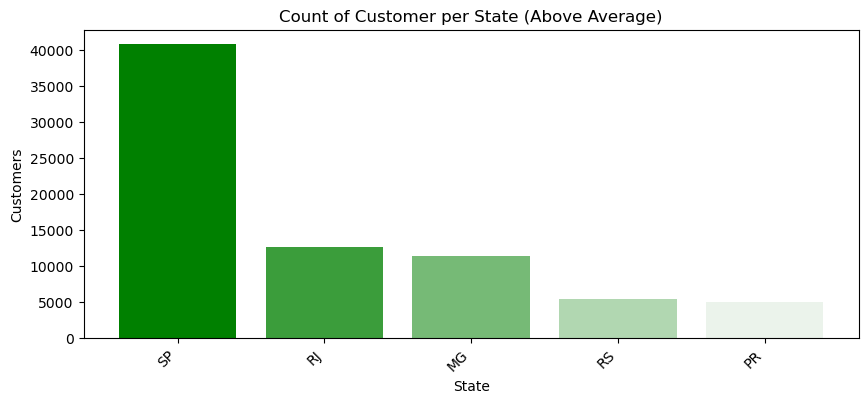

3602.074074074074

In [44]:
base_color = 'green'

# Hitung rata-rata
average_customers = customer_id_per_state.mean()

# Filter data hanya untuk state dengan jumlah pelanggan di atas rata-rata
above_average_states = customer_id_per_state[customer_id_per_state > average_customers]

# Plot bar chart dengan gradasi warna biru tua dan biru muda
plt.figure(figsize=(10, 4))
bars = plt.bar(above_average_states.index, above_average_states, color=[
    base_color if state_value == above_average_states.max() else sns.light_palette(base_color, n_colors=len(above_average_states), reverse=True, as_cmap=False)[i] for i, state_value in enumerate(above_average_states)
])
plt.title('Count of Customer per State (Above Average)')
plt.xlabel('State')
plt.ylabel('Customers')
plt.xticks(rotation=45, ha='right')

plt.show()

average_customers

### Pertanyaan 3: Bagaimana tingkat keberhasilan pengiriman pesanan yang dibuat?

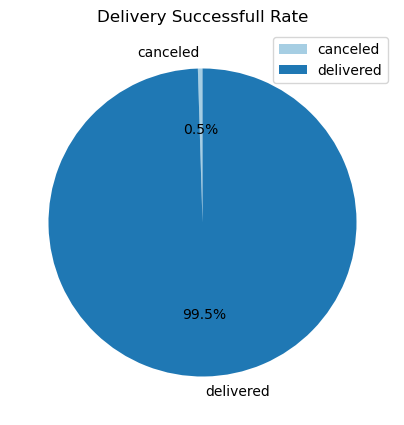

In [45]:
order_status_by_customer_id = {key: value for key, value in order_status_by_customer_id.items() if key not in ['approved', 'invoiced', 'processing', 'shipped', 'unavailable']}

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(order_status_by_customer_id.values(), labels=order_status_by_customer_id.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Delivery Successfull Rate')
plt.legend()
plt.show()


### Pertanyaan 4: Kategori produk apa saja yang paling banyak dipesan?

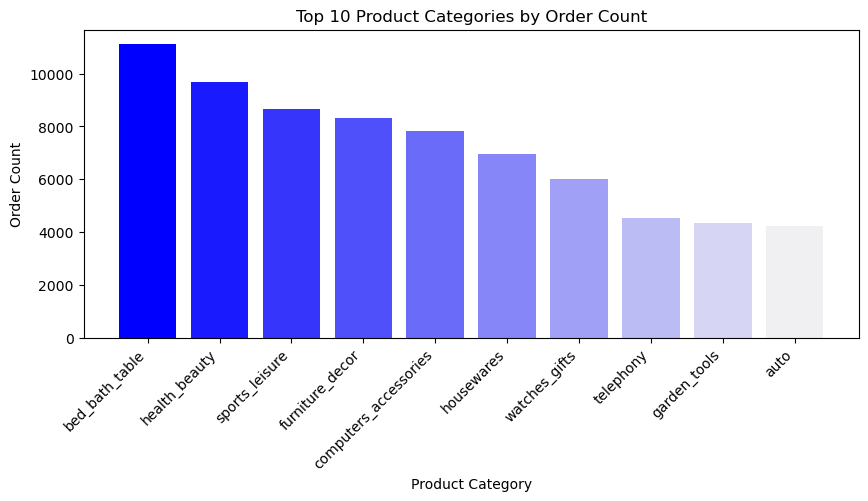

In [46]:
base_color = 'blue'

intensity_values = range(len(top_10_product_category))

plt.figure(figsize=(10, 4))
bars = plt.bar(top_10_product_category.index, top_10_product_category, color=sns.light_palette(base_color, n_colors=len(top_10_product_category), reverse=True, as_cmap=False))
plt.title('Top 10 Product Categories by Order Count')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')

plt.show()

In [47]:
# # Menyimpan dataframe yang telah dibersihkan ke dalam format csv
# df_sales_cleaned.to_csv("all_data.csv", index=False)